<a href="https://colab.research.google.com/github/DonghyunKim98/probability_statistics_data_analysis/blob/main/%ED%99%95%EB%A5%A0%EB%B0%8F%ED%86%B5%EA%B3%842022_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정보시스템학과 - 확률및통계 2022
# 5조 - 배달 어플리케이션에 미치는 요소들의 상관관계 분석

In [ ]:
# 기본 라이브러리 import
import pandas as pd
import numpy as np
from google.colab import drive
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from scipy import stats
import statistics

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/infosys2022-statistics-raw-data.csv'

data = pd.read_csv(file_path)

print(data.shape)
data.head(5)

(130, 76)


,타임스탬프,1-1 귀하의 성별은 무엇입니까?,1-2 귀하의 연령은 무엇입니까?,"1-3 귀하의 동거 가족 인원수는 몇 명인가요? (1인가구의 경우, 본가 구성원을 포함해주세요)",1-3 최근 2달 이내 배달앱을 사용한 경험이 있나요?,2. 제일 중요하다고 생각하는 요소 [배달비],2. 제일 중요하다고 생각하는 요소 [배달시간],2. 제일 중요하다고 생각하는 요소 [별점],2. 제일 중요하다고 생각하는 요소 [리뷰수],3-1 1인당 가격이 12000원 이하일 때 [배달비],...,6-4 21:01 ~ 01:00 (야식) [배달시간],6-4 21:01 ~ 01:00 (야식) [별점],6-4 21:01 ~ 01:00 (야식) [리뷰수],추가 설문조사 참여 여부,1. 귀하의 MBTI는 무엇인가요? (16 personalities 기준),2. 한달에 배달을 몇 번 시켜먹나요?,3. 배달을 시킬 때 배달 최소 금액을 고려하시나요?,4. 자주 시켜먹는 음식의 종류는 무엇인가요?,5. 배달 어플의 필터링 기능을 사용 하시나요?,"6. 귀하의 전화번호는 무엇인가요?\n\n※ 기프티콘을 제공하기 위함으로만 사용되며, 기프티콘 제공이 완료되면 파기됩니다."
0,2022. 11. 15 오후 1:34:19,여자,20대,4명,네,4.0,4.0,5.0,5.0,5.0,...,4.0,4.0,3.0,예,ENFJ,1~5번,예,디저트,예,010-8813-4221
1,2022. 11. 15 오후 1:38:16,남자,20대,5명,네,5.0,4.0,2.0,3.0,5.0,...,4.0,2.0,2.0,예,ISFP,6~10번,예,한식,예,01089365435
2,2022. 11. 15 오후 1:38:57,남자,20대,4명,네,5.0,5.0,5.0,3.0,5.0,...,4.0,4.0,3.0,아니오,NaN,NaN,NaN,NaN,NaN,NaN
3,2022. 11. 15 오후 1:42:45,남자,20대,4명,네,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,4.0,예,INTJ,1~5번,예,일식,예,01030503469
4,2022. 11. 15 오후 1:43:00,여자,20대,4명,네,5.0,2.0,5.0,1.0,3.0,...,4.0,4.0,1.0,예,ESFJ,1~5번,아니오,한식,예,010-9356-1755


## 데이터 전처리과정
1. 배달앱을 사용하지 않는 사용자 제거
2. 각 column 의 네이밍 변환 -> 너무 길어서 눈에 안들어옴

In [ ]:
# 데이터 전처리 ① - 배달앱을 사용하지 않는 사용자 제거
data = data.drop(data[data['1-3 최근 2달 이내 배달앱을 사용한 경험이 있나요?']=='아니오'].index)
data = data.drop('1-3 최근 2달 이내 배달앱을 사용한 경험이 있나요?',axis=1)
data.shape

(121, 75)

In [ ]:
# 데이터 전처리 ② - 각 column 의 네이밍 변환

column_names = data.columns.values.tolist()
prefix_names = ['noCondition',
                'foodCostUnder12','foodCostUnder18','foodCostUnder24','foodCostOver24',
                'eatAlone','eatWithFriends2to3', 'eatWithFriendsOver4','eatWithFamily',
                'weekday','holiday','specialDay',
                'lunch','snack','dinner','midnight',
                ]
suffix_names = ['cost','time','rating','numberOfReview']
renamedColumn = {
    '1-1 귀하의 성별은 무엇입니까?' : 'userSex',
    '1-2 귀하의 연령은 무엇입니까?' : 'userAge',
    '1-3 귀하의 동거 가족 인원수는 몇 명인가요? (1인가구의 경우, 본가 구성원을 포함해주세요)' : 'numberOfFamily'
}
for idx1, prefix in enumerate(prefix_names):
    for idx2, suffix in enumerate(suffix_names):
      renamedColumn[column_names[4*(idx1+1) + idx2]]=(prefix+'-'+suffix)
  

data = data.rename(columns=renamedColumn)

data.head(3)

,타임스탬프,userSex,userAge,numberOfFamily,noCondition-cost,noCondition-time,noCondition-rating,noCondition-numberOfReview,foodCostUnder12-cost,foodCostUnder12-time,...,midnight-time,midnight-rating,midnight-numberOfReview,추가 설문조사 참여 여부,1. 귀하의 MBTI는 무엇인가요? (16 personalities 기준),2. 한달에 배달을 몇 번 시켜먹나요?,3. 배달을 시킬 때 배달 최소 금액을 고려하시나요?,4. 자주 시켜먹는 음식의 종류는 무엇인가요?,5. 배달 어플의 필터링 기능을 사용 하시나요?,"6. 귀하의 전화번호는 무엇인가요?\n\n※ 기프티콘을 제공하기 위함으로만 사용되며, 기프티콘 제공이 완료되면 파기됩니다."
0,2022. 11. 15 오후 1:34:19,여자,20대,4명,4.0,4.0,5.0,5.0,5.0,4.0,...,4.0,4.0,3.0,예,ENFJ,1~5번,예,디저트,예,010-8813-4221
1,2022. 11. 15 오후 1:38:16,남자,20대,5명,5.0,4.0,2.0,3.0,5.0,4.0,...,4.0,2.0,2.0,예,ISFP,6~10번,예,한식,예,01089365435
2,2022. 11. 15 오후 1:38:57,남자,20대,4명,5.0,5.0,5.0,3.0,5.0,4.0,...,4.0,4.0,3.0,아니오,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 분석 및 시각화
1. 조절변수 내에서 독립변수 히스토그램
2. 조절변수 내에서 다양한 독립변수 기술통계분석
3. 조절변수 간의 하나의 독립변수 기술통계분석
4. 조절변수 내에서 독립변수간 피어슨 상관관계 분석
5. 영가설 검증

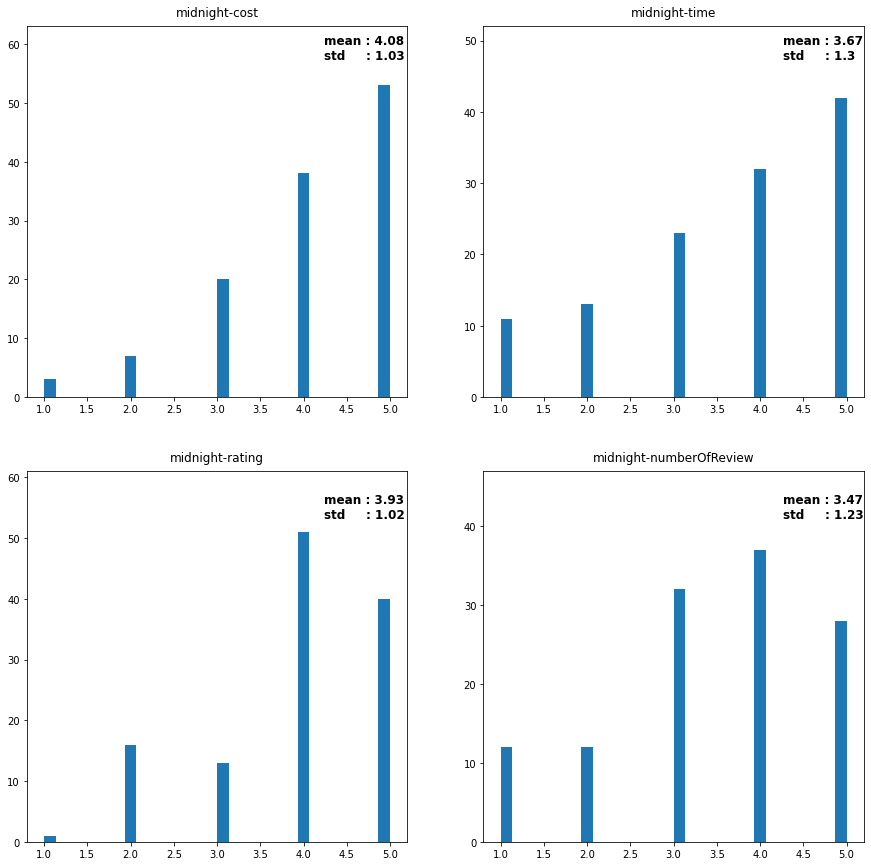

In [ ]:
# ① 조절변수 내에서 독립변수 히스토그램

def printMeanAndStd (columnName):
  ret  = 'mean : '
  ret += str(round(data[columnName].mean(),2)) 
  ret += '\n'
  ret += 'std     : '
  ret += str(round(data[columnName].std(),2))
  return ret

def showHistogramByPrefix (prefixIndex):
    prefixName = prefix_names[prefixIndex]
    suffix_names = ['cost','time','rating','numberOfReview']
    figure, axis = plt.subplots(2, 2,figsize=(15, 15))
    for idx, suffix in enumerate(suffix_names):
        axis[int(idx/2),idx%2].hist(data[prefixName + '-' + suffix],bins=30)
        axis[int(idx/2),idx%2].set_title(prefixName + '-' + suffix,pad=10)
        axis[int(idx/2),idx%2].set_ylim(top=data.value_counts(prefixName+'-'+suffix).max()+10)

    plt.figtext(.4,.85,printMeanAndStd(prefixName+'-cost'),fontSize='large',fontWeight='bold')
    plt.figtext(.825,.85,printMeanAndStd(prefixName+'-time'),fontSize='large',fontWeight='bold')
    plt.figtext(.4,.425,printMeanAndStd(prefixName+'-rating'),fontSize='large',fontWeight='bold')
    plt.figtext(.825,.425,printMeanAndStd(prefixName+'-numberOfReview'),fontSize='large',fontWeight='bold')
    plt.show()  

# for i in range(6):
showHistogramByPrefix(15)

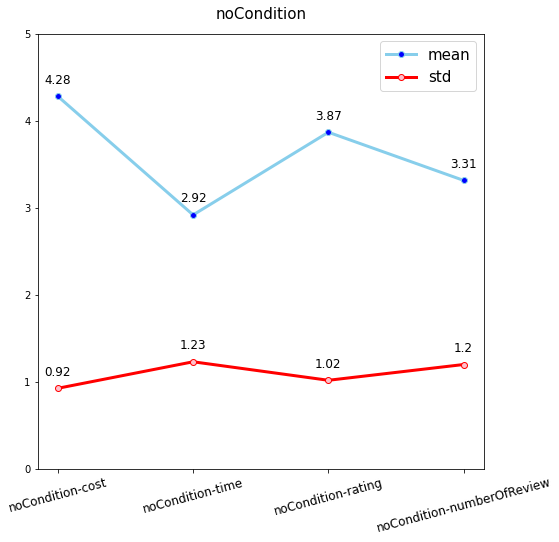

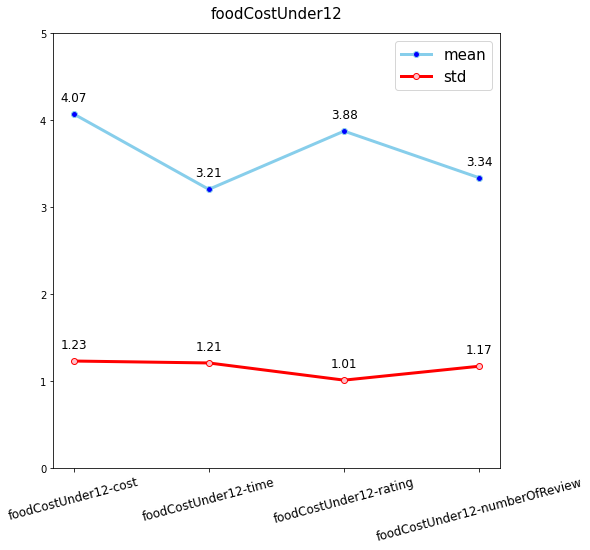

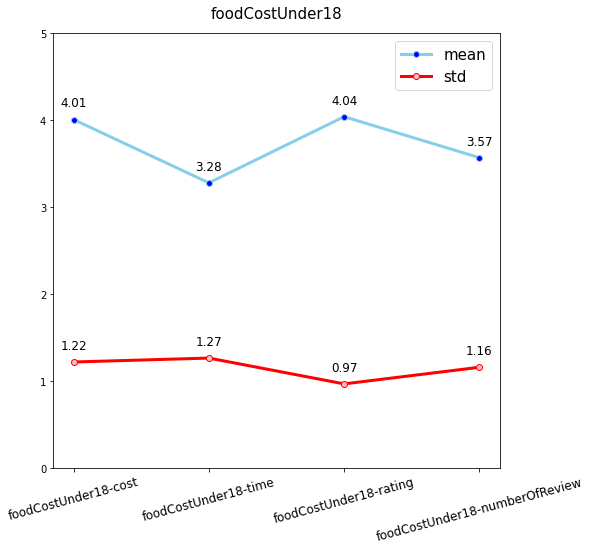

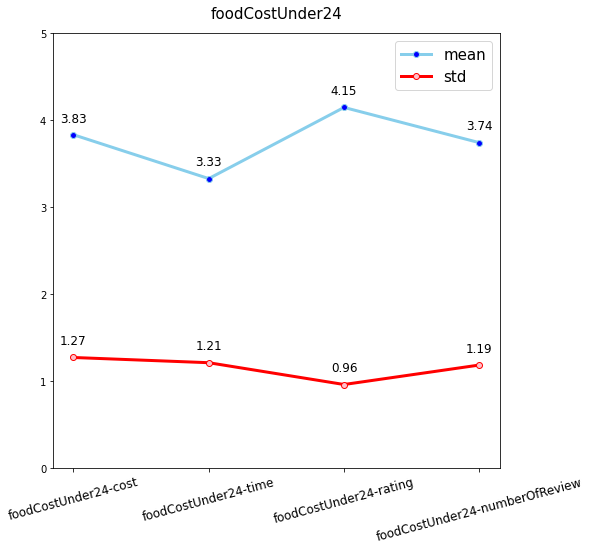

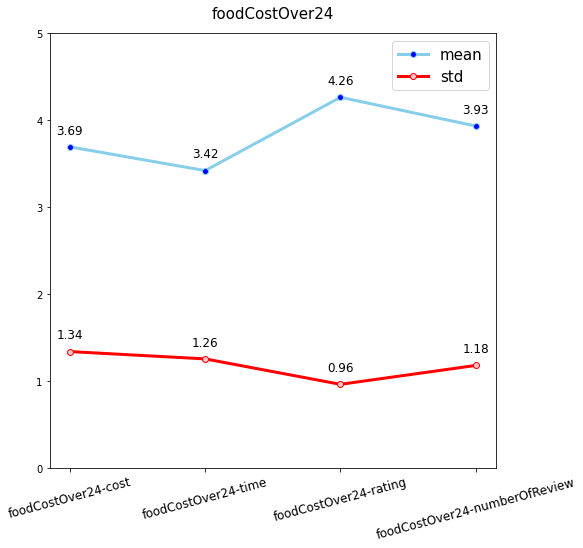

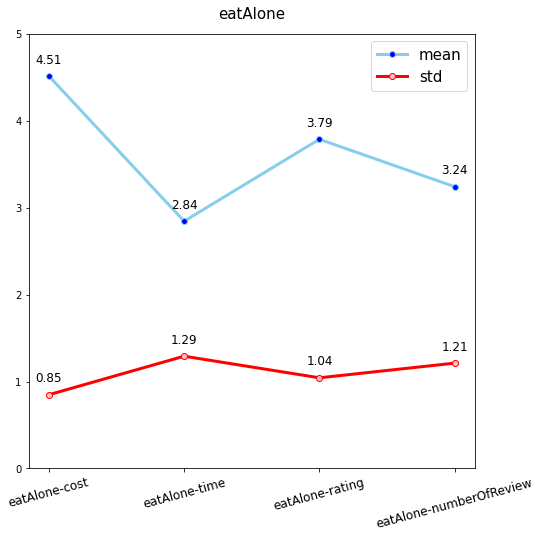

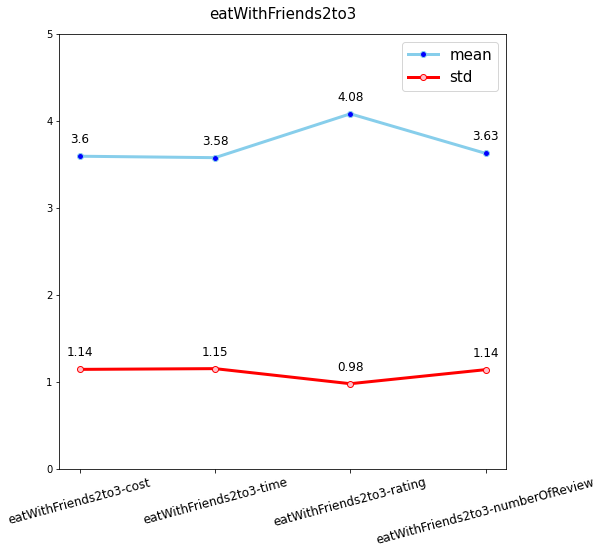

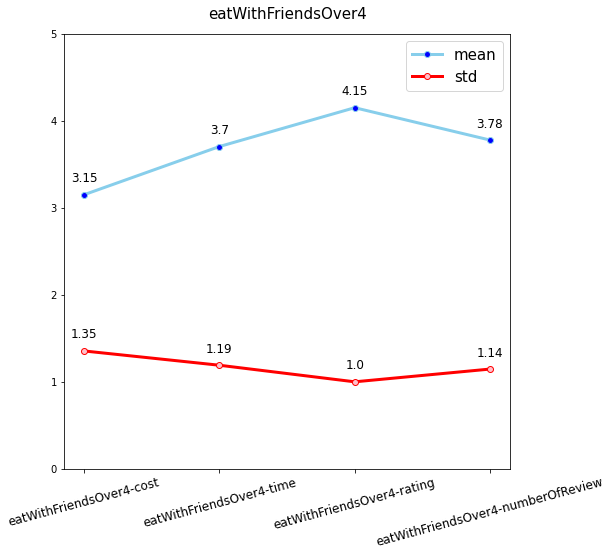

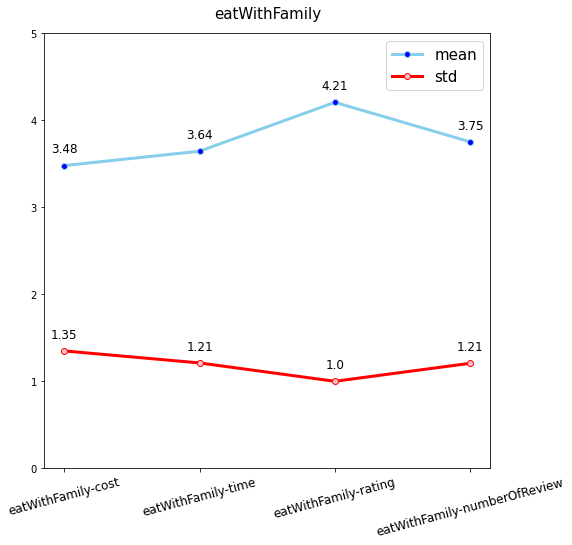

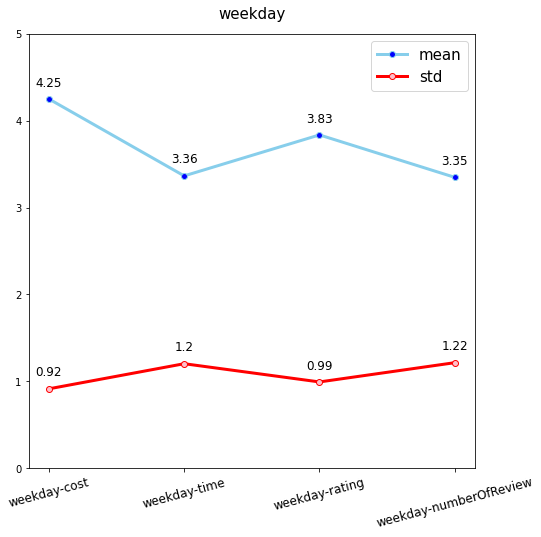

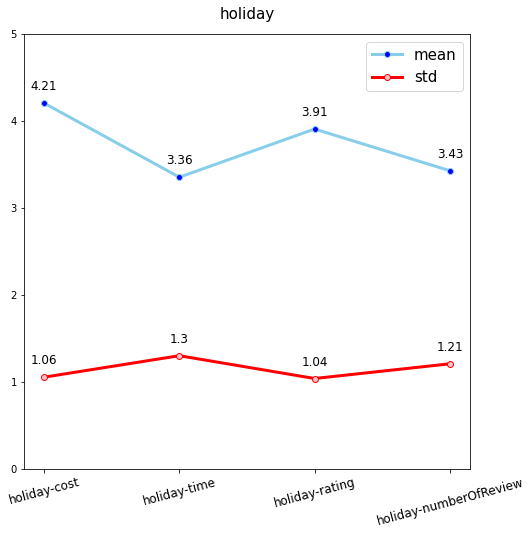

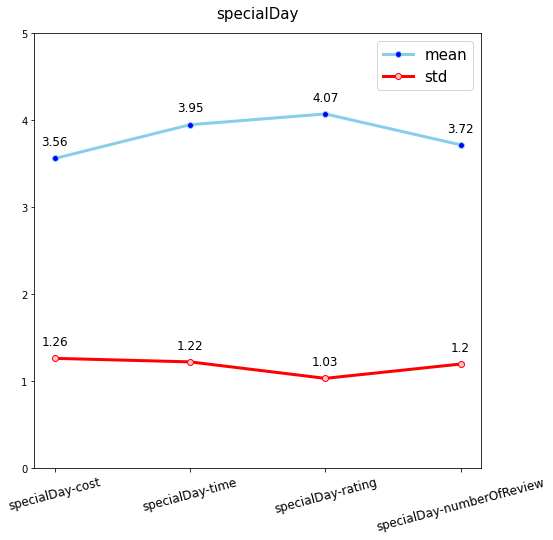

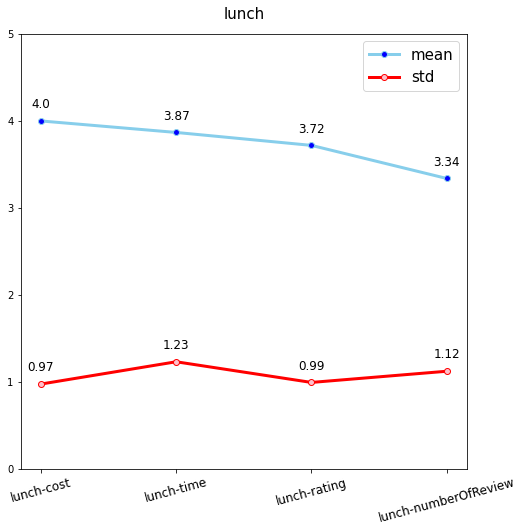

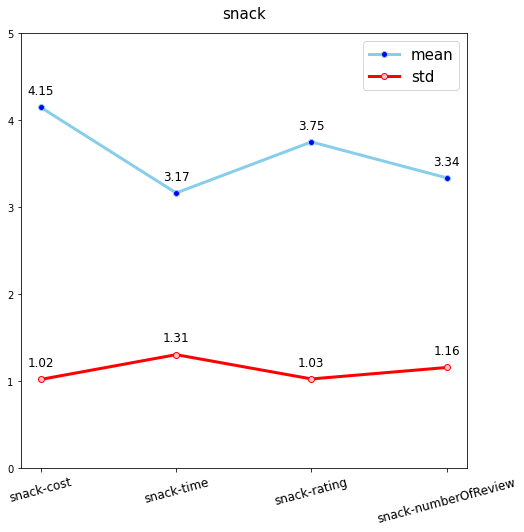

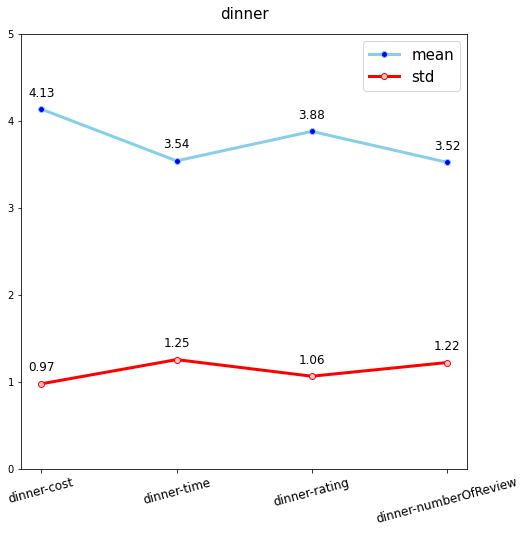

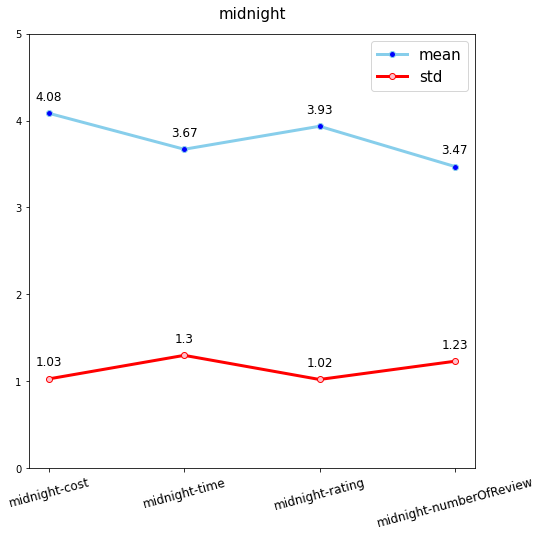

In [ ]:
# ② 조절변수 내에서 다양한 독립변수 기술통계분석
def showMeanAndStdInOneModerate (prefixIndex):
    prefixName = prefix_names[prefixIndex]

    dataBySingleModerate = data.iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]

    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(dataBySingleModerate.mean().index,
             dataBySingleModerate.mean(),
             color='skyblue',
             marker='o', markerfacecolor='blue',
             markersize=6,lineWidth=3,
             label='mean'
             )
    plt.plot(dataBySingleModerate.std().index,
             dataBySingleModerate.std(),
             color='red',
             marker='o', markerfacecolor='pink',
             markersize=6,lineWidth=3,
             label='std'
             )
    for idx in range(len(dataBySingleModerate.mean().index)):
      ax.text(dataBySingleModerate.mean().index[idx],
              dataBySingleModerate.mean()[idx] +0.15 ,
              round(dataBySingleModerate.mean()[idx],2), 
              size=12, horizontalalignment='center')
      ax.text(dataBySingleModerate.std().index[idx],
              dataBySingleModerate.std()[idx] +0.15 ,
              round(dataBySingleModerate.std()[idx],2), 
              size=12, horizontalalignment='center')
    plt.title(prefixName,size=15,pad=15)
    plt.ylim([0,5])
    plt.xticks(rotation=15,fontSize=12)
    plt.legend(prop={'size':15})
    plt.show()

for i in range(16):
  showMeanAndStdInOneModerate(i)

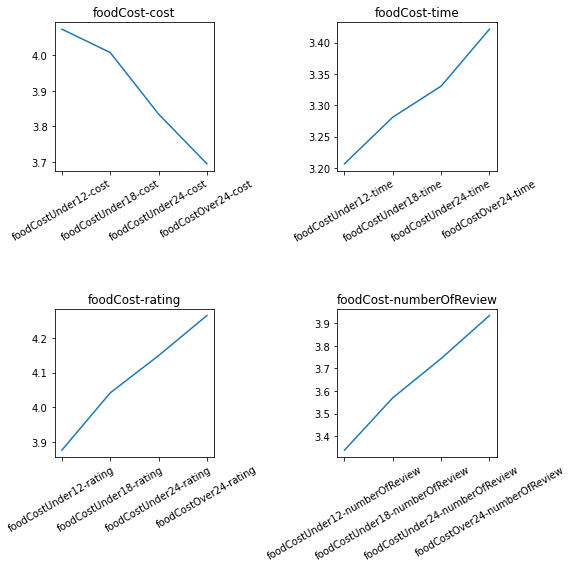

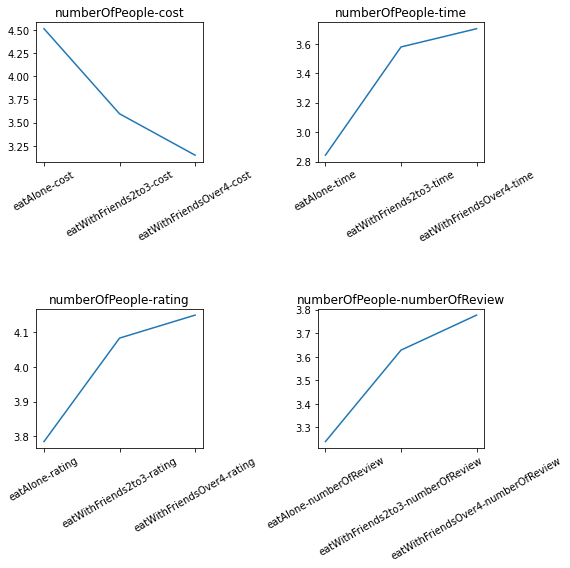

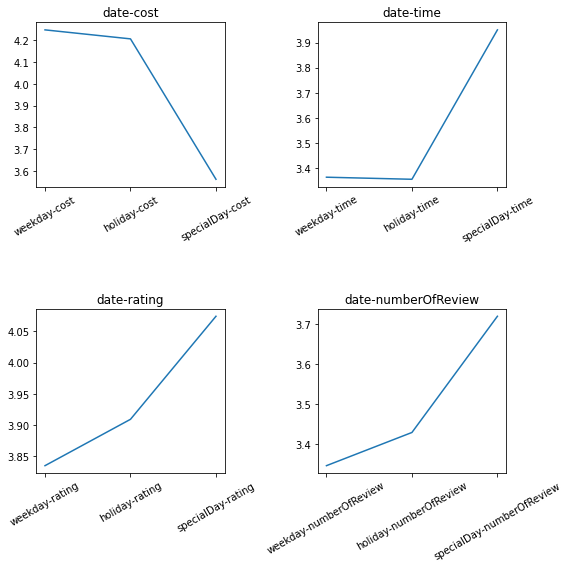

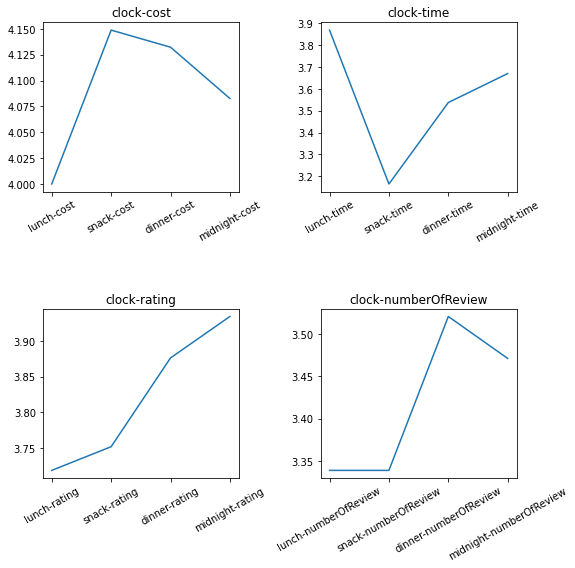

In [ ]:
# ③ 조절변수 간의 하나의 독립변수 기술통계분석
moderateColumnIndexesList = [
    [8,12,16,20], # 음식 가격
    [24,28,32],   # 같이 먹는 사람 (가족 제외)
    [40,44,48],   # 배달 날짜
    [52,56,60,64] # 배달 시간
    ]
moderateNames=['foodCost','numberOfPeople','date','clock']

def showPlotByModerates (moderateIndex):
  modetaeColumnIndexes = moderateColumnIndexesList[moderateIndex]
  moderateName = moderateNames[moderateIndex]
  
  costByModerates = data.iloc[:,modetaeColumnIndexes]
  timeByModerates = data.iloc[:,[x+1 for x in modetaeColumnIndexes]]
  ratingByModerates = data.iloc[:,[x+2 for x in modetaeColumnIndexes]]
  reviewByModerates = data.iloc[:,[x+3 for x in modetaeColumnIndexes]]

  moderatedIndependentValues = [costByModerates,timeByModerates,ratingByModerates,reviewByModerates]
  suffix_names = ['cost','time','rating','numberOfReview']

  figure, axis = plt.subplots(2, 2,figsize=(8, 8))

  for idx, suffix in enumerate(suffix_names):
    axis[int(idx/2),idx%2].plot(moderatedIndependentValues[idx].mean().index,moderatedIndependentValues[idx].mean())
    axis[int(idx/2),idx%2].set_title(moderateName + '-' + suffix)
    axis[int(idx/2),idx%2].tick_params(axis='x', labelrotation = 30)

  plt.tight_layout(h_pad=5) # 겹치지 않게 설정, 여백설정
  plt.show()

for i in range(4):
  showPlotByModerates(i)

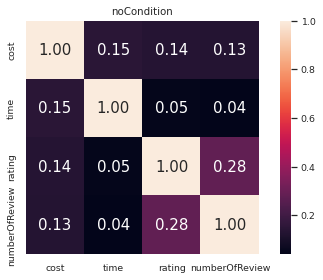

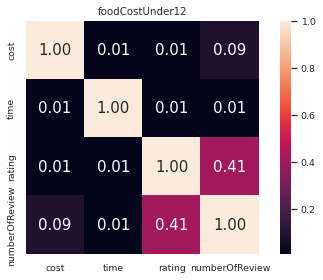

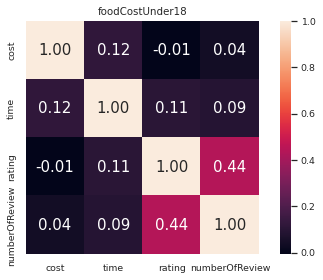

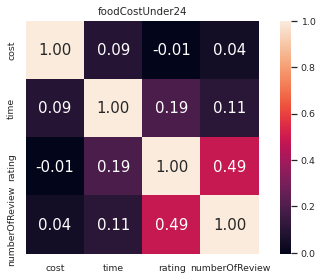

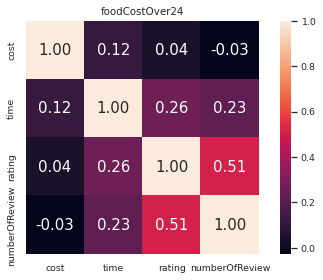

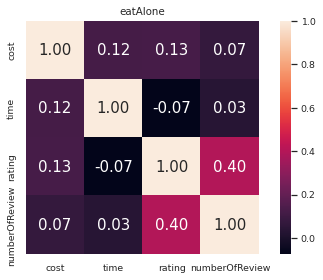

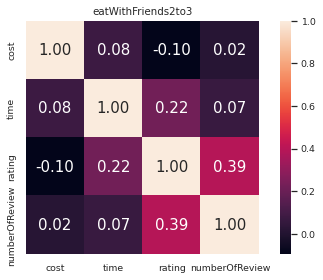

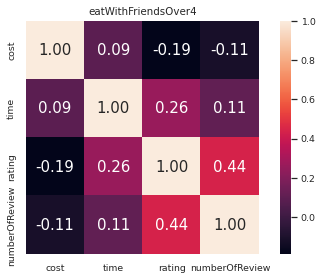

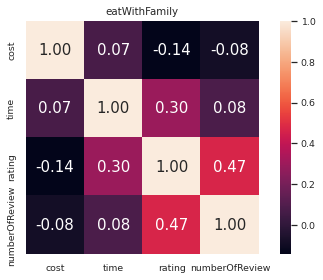

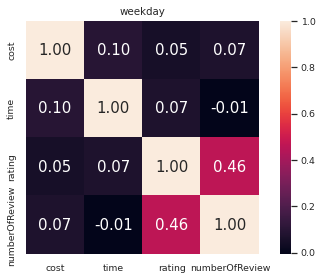

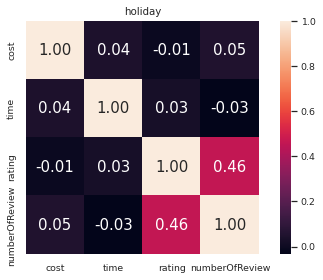

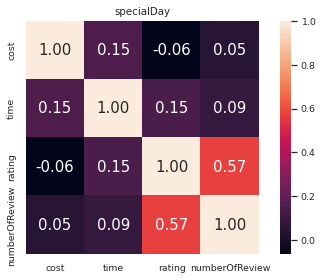

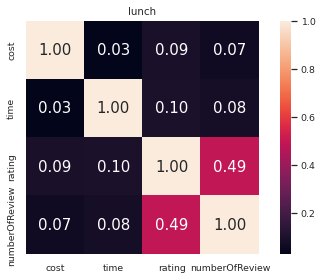

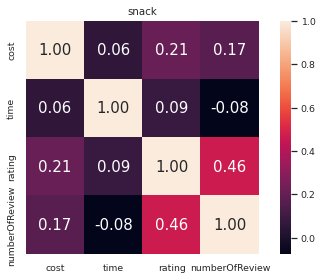

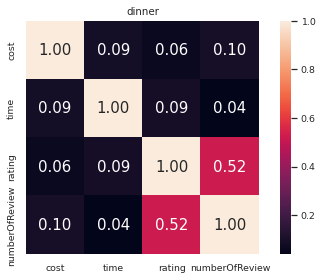

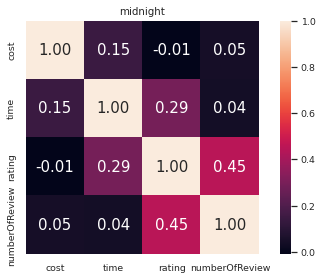

In [ ]:
# ④ 조절변수 내에서 독립변수간 피어슨 상관관계 분석
def correlationHitmap (prefixIndex):
    prefixName = prefix_names[prefixIndex]
    conditionCols = []
    for suffix in suffix_names:
      conditionCols.append(prefixName+'-'+suffix)
    Corr = data[conditionCols].corr(method='pearson')
    cols_view=['cost','time','rating','numberOfReview']
    sns.set(font_scale=0.85)
    hm = sns.heatmap(Corr.values,
                    cbar = True,
                    annot= True,
                    square= True,
                    fmt = '.2f',
                    annot_kws = {'size': 15},
                    yticklabels = cols_view,
                    xticklabels = cols_view)

    plt.title(prefixName)
    plt.tight_layout()
    plt.show()

for i in range(16):
  correlationHitmap(i)

In [ ]:
# ⑤ 영가설 검증
# ttest_ind : 두 변량의 평균이 같을 확률을 t-검정으로 진행
# 0.01 보다 낮음 -> 두 변량의 평균이 같을 확률이 1% 미만임 -> 영가설 기각
# 0.01 보다 큼  -> 두 변량의 평균이 같을 확률이 1% 이상임 -> 영가설 채택

moderates = prefix_names
independentVariables = ['time','rating','numberOfReview']

zipped_Moderates = []
zipped_independentVariables = []
zipped_pValues = []
zipped_99PercentageAdoptions =[]
zipped_95PercentageAdoptions =[]
for moderate in moderates:
  for independentVariable in independentVariables:
    zipped_Moderates.append(moderate)
    zipped_independentVariables.append(independentVariable)
    p_value = stats.ttest_ind(data[moderate+'-cost'],data[moderate+'-'+independentVariable],equal_var=False, alternative='greater').pvalue
    zipped_pValues.append(p_value)
    zipped_99PercentageAdoptions.append(p_value < 0.01)
    zipped_95PercentageAdoptions.append(p_value < 0.05)

nullHyphothesisTestingDataSet = list(zip(zipped_Moderates,zipped_independentVariables,zipped_pValues,zipped_99PercentageAdoptions,zipped_95PercentageAdoptions))
df = pd.DataFrame(data=nullHyphothesisTestingDataSet,columns=['조절변수','독립변수','pValue','99%유의수준 채택여부','95%유의수준 채택여부'])

df.to_csv('/content/drive/MyDrive/hypothesis.csv')
print(df)



                   조절변수            독립변수        pValue  99%유의수준 채택여부  \
0           noCondition            time  2.959818e-19          True   
1           noCondition          rating  5.393562e-04          True   
2           noCondition  numberOfReview  1.198690e-11          True   
3       foodCostUnder12            time  4.276608e-08          True   
4       foodCostUnder12          rating  8.639951e-02         False   
5       foodCostUnder12  numberOfReview  1.714365e-06          True   
6       foodCostUnder18            time  4.317808e-06          True   
7       foodCostUnder18          rating  5.920920e-01         False   
8       foodCostUnder18  numberOfReview  2.307237e-03          True   
9       foodCostUnder24            time  9.146652e-04          True   
10      foodCostUnder24          rating  9.842089e-01         False   
11      foodCostUnder24  numberOfReview  2.831308e-01         False   
12       foodCostOver24            time  5.193389e-02         False   
13    

# **Group By 활용**
  >## **남/녀 인원수 확인**
  1. 남/녀 기준
    * 설문조사에 응답한 사람 중 남자와 여자 인원 수 직접 확인해보기
    * 데이터를 group by의 형식으로 구분
      * userSex = data.groupby('userSex')
    * pandas의 count() 함수 활용하여 남/녀 인원수 확인
      * numofUserSex = userSex['userSex'].count()
    * 위 두 코드를 통합하여 한 줄로 축약가능
      * numofUserSex = data.groupby('userSex')['userSex'].count()

In [ ]:
userSex = data.groupby('userSex')
numofUserSex = userSex['userSex'].count()
print(numofUserSex)

# numofUserSex = data.groupby('userSex')['userSex'].count()
# print(numofUserSex)

userSex
남자    84
여자    37
Name: userSex, dtype: int64


#**1. 조절변수 내에서 다양한 독립변수 기술통계분석**
 * 성별에 따른 배달비, 배달시간, 별점수, 리뷰수에 관한 각 상황별 점수 분포 확인
 * groupby를 활용하여 dict_key로 '남자', '여자'별 그래프를 따로 표시 가능하게 함
  * userSex[('남자' or '여자')]
  * groupby 자체에서 iloc를 활용할 수 없어 dictionary 형태로 groupby를 응용
 * 평균 점수가 주된 비교의 대상이기 때문에 표준편차는 제외하고 평균만 남/녀 비교

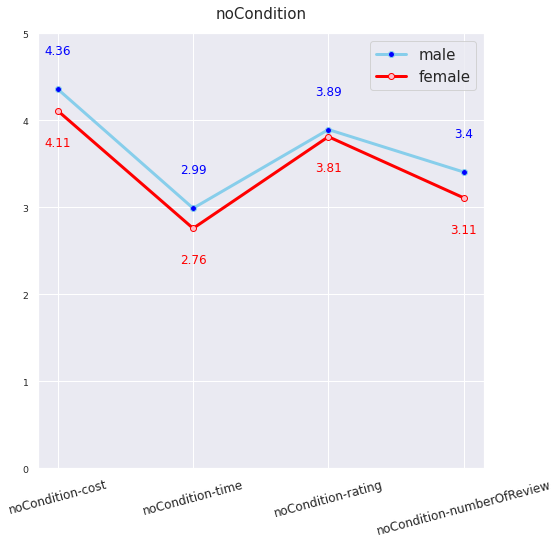

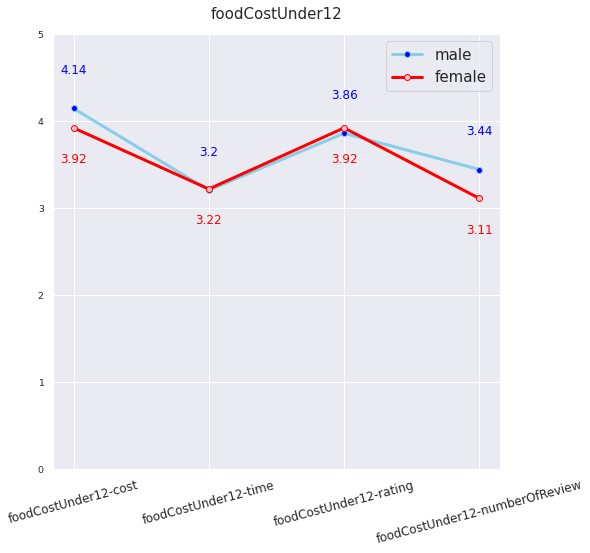

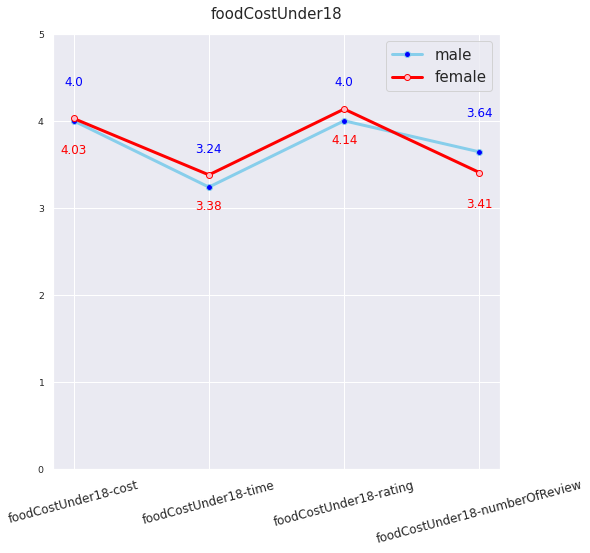

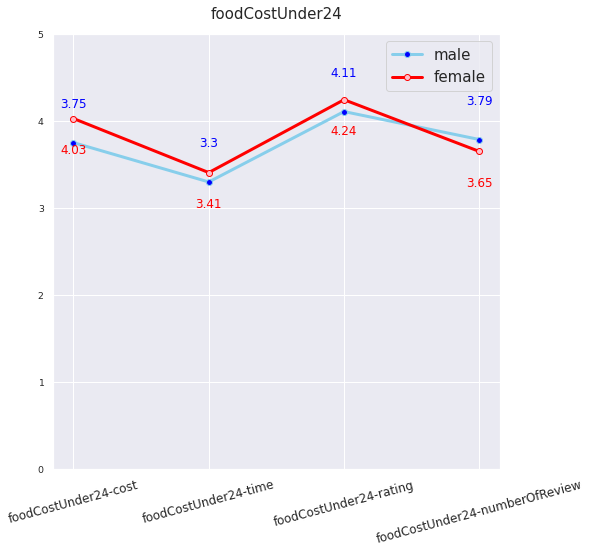

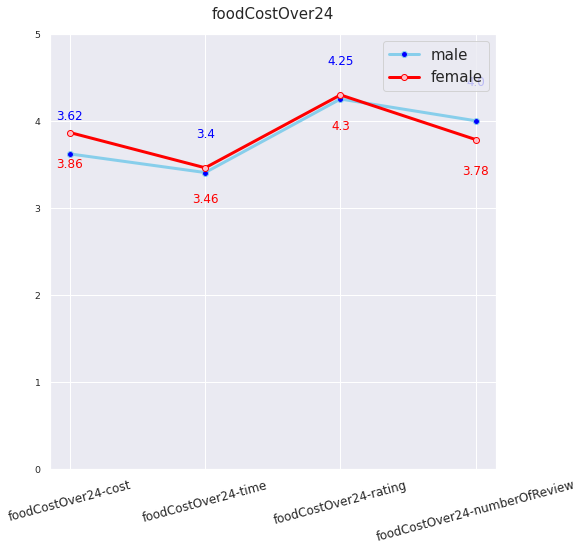

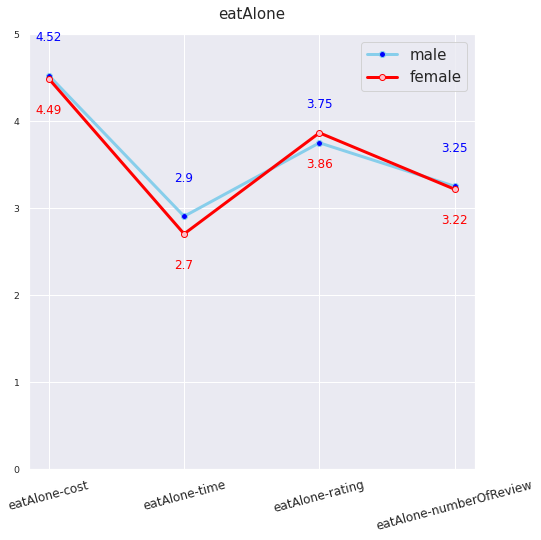

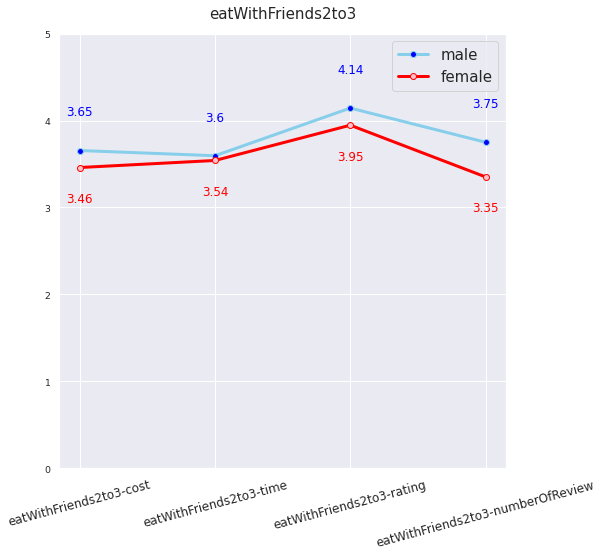

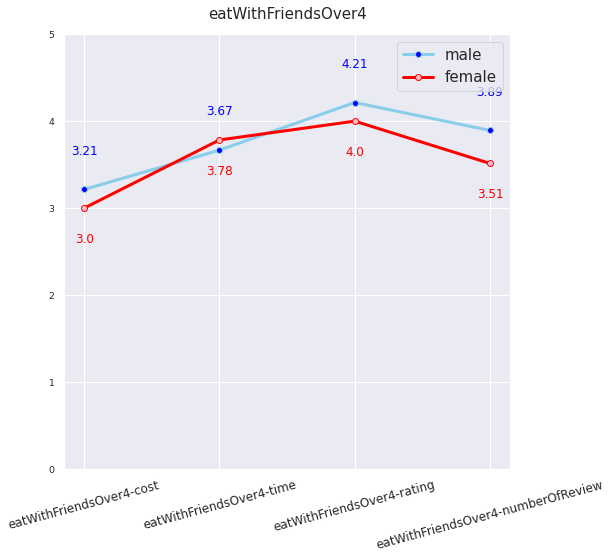

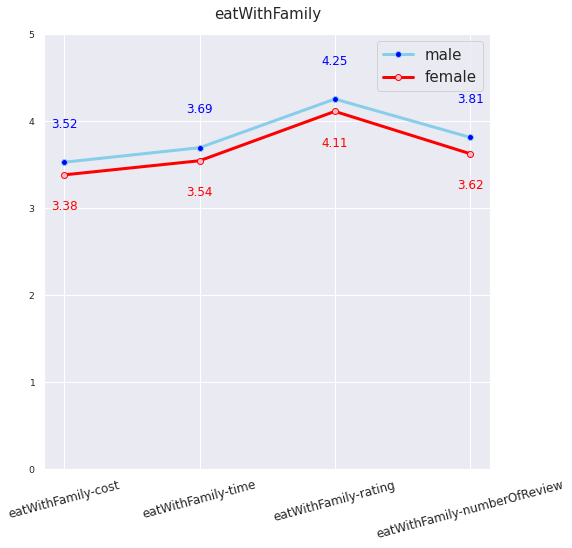

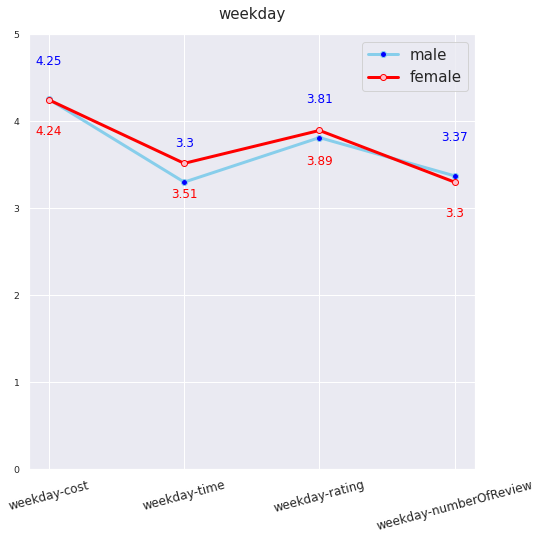

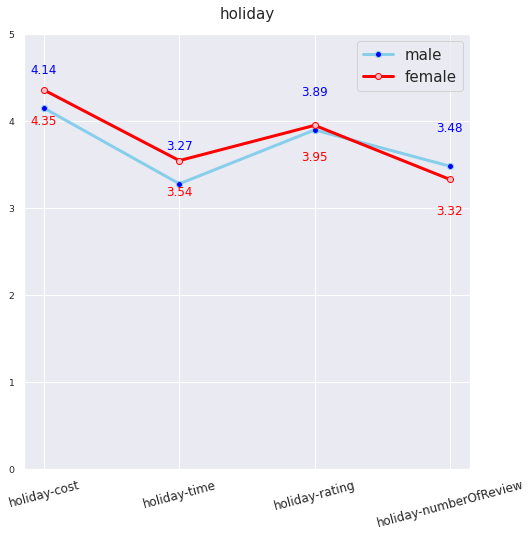

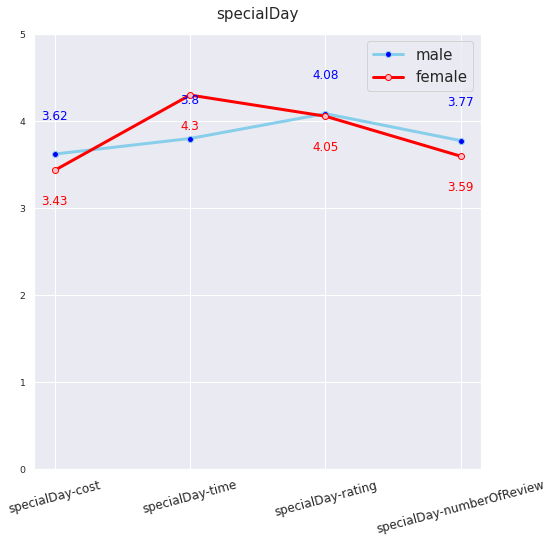

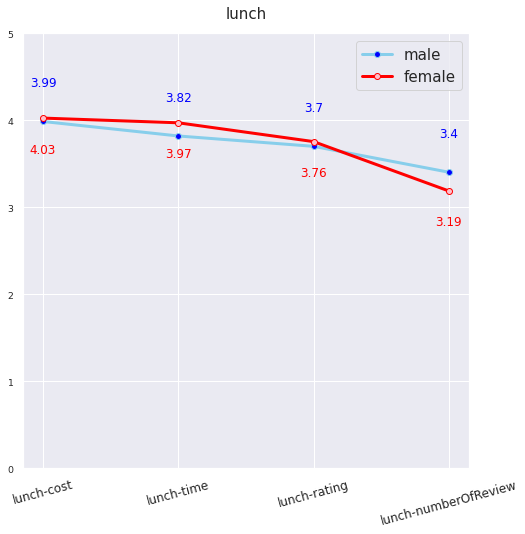

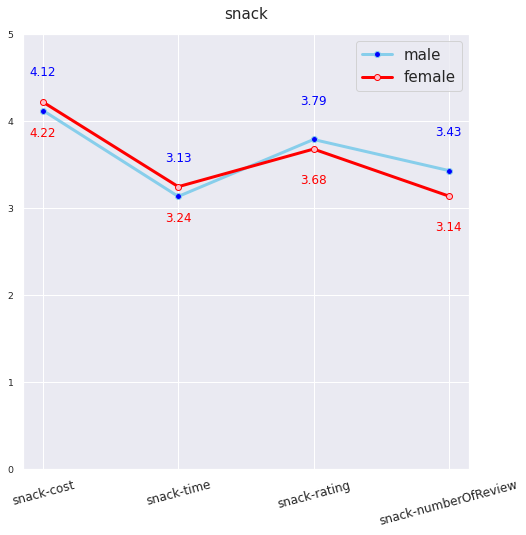

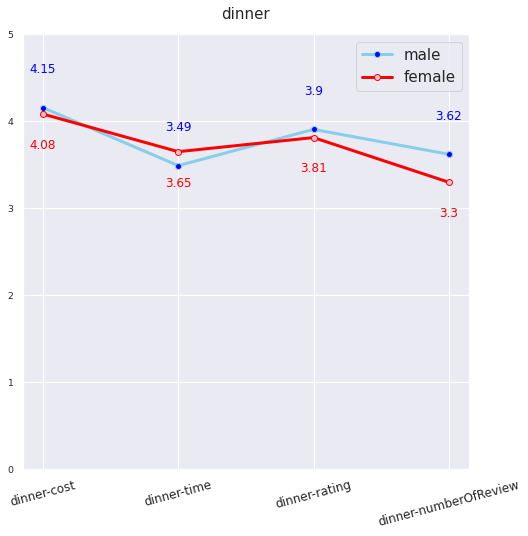

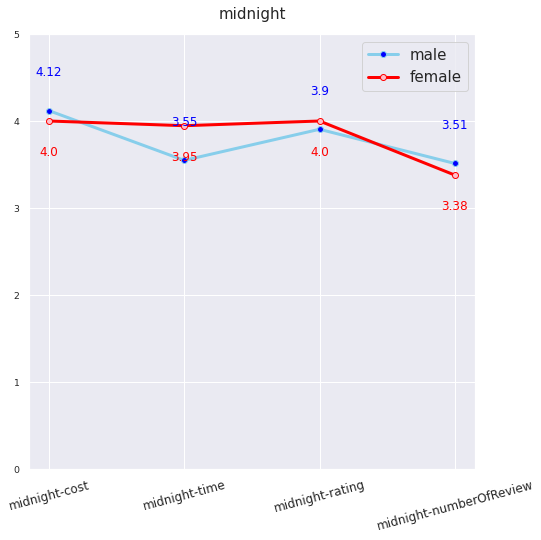

In [ ]:
userSex = dict(list(data.groupby(['userSex'])))

# ② 조절변수 내에서 다양한 독립변수 기술통계분석
def showMeanAndStdInOneModerate (prefixIndex):

  prefixName = prefix_names[prefixIndex]

  dataBySingleModerate = data.iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]
  male = userSex[('남자')].iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]
  female = userSex[('여자')].iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]

  fig, ax = plt.subplots(figsize=(8,8))
  plt.plot(male.mean().index,
             male.mean(),
             color='skyblue',
             marker='o', markerfacecolor='blue',
             markersize=6,lineWidth=3,
             label='male'
             )
  plt.plot(female.mean().index,
             female.mean(),
             color='red',
             marker='o', markerfacecolor='pink',
             markersize=6,lineWidth=3,
             label='female'
             )
  for idx in range(len(dataBySingleModerate.mean().index)):
      ax.text(male.mean().index[idx],
              male.mean()[idx] +0.4 ,
              round(male.mean()[idx],2), 
              size=12, horizontalalignment='center', color='blue')
      ax.text(female.mean().index[idx],
              female.mean()[idx] -0.4 ,
              round(female.mean()[idx],2), 
              size=12, horizontalalignment='center', color='red')
  plt.title(prefixName,size=15,pad=15)
  plt.ylim([0,5])
  plt.xticks(rotation=15,fontSize=12)
  plt.legend(prop={'size':15})
  plt.show()

for i in range(16):
  showMeanAndStdInOneModerate(i)

#**2. 조절변수 간의 하나의 독립변수 기술통계분석**
 * 각 상황에서 하나의 독립변수의 분포 정도를 그래프로 표시
 * groupby를 활용하여 dict_key로 '남자', '여자'별 그래프를 따로 표시 가능하게 함
  * userSex[('남자' or '여자')]
  * groupby 자체에서 iloc를 활용할 수 없어 dictionary 형태로 groupby를 응용
 * 조절변수 내에서 다양한 독립변수 기술통계분석보다 남, 녀 차이가 크게 두드러지는 그래프가 상당히 발견됨
  * 음식값 - 배달비
  * 배달날 - 배달비
  * 배달시간 - 배달비, 별점, 리뷰수

blue: Male / Orange: Female


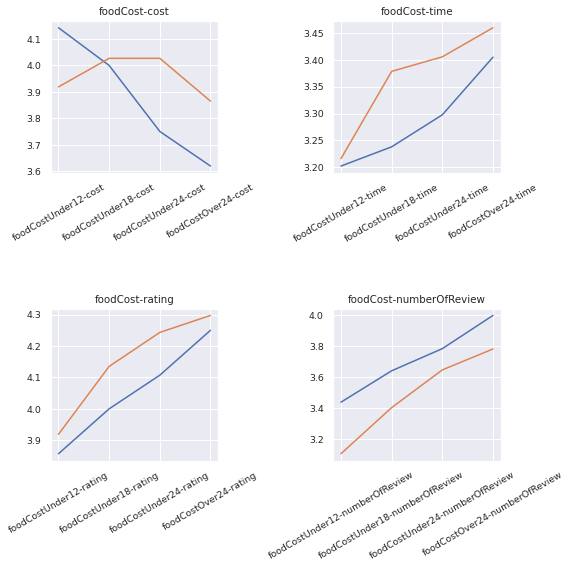

blue: Male / Orange: Female


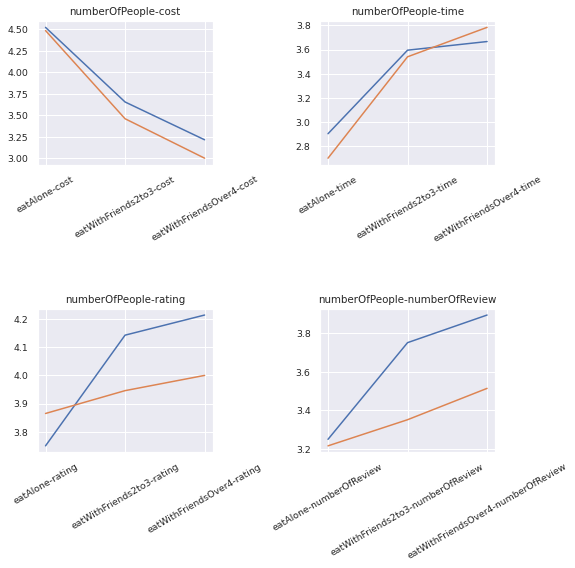

blue: Male / Orange: Female


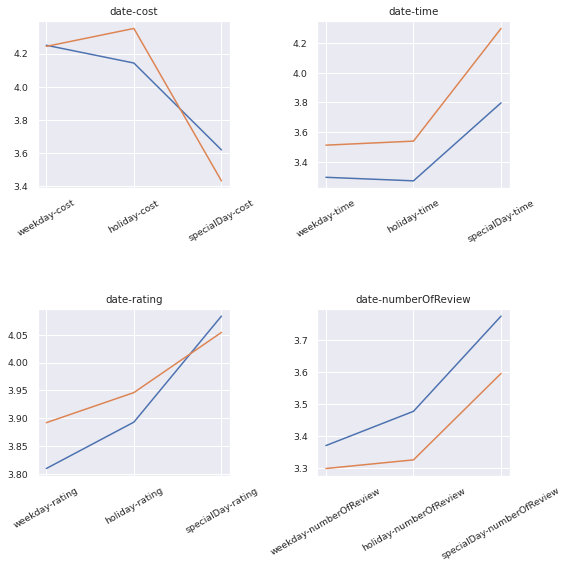

blue: Male / Orange: Female


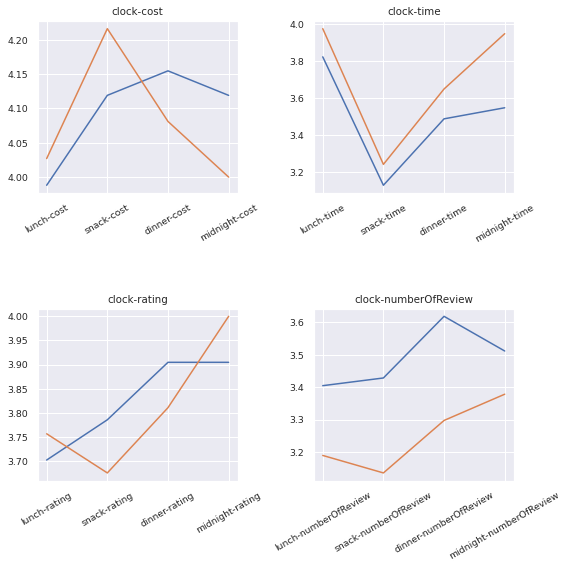

In [ ]:
# ③ 조절변수 간의 하나의 독립변수 기술통계분석
moderateColumnIndexesList = [
    [8,12,16,20], # 음식 가격
    [24,28,32],   # 같이 먹는 사람 (가족 제외)
    [40,44,48],   # 배달 날짜
    [52,56,60,64] # 배달 시간
    ]
moderateNames=['foodCost','numberOfPeople','date','clock']

def showPlotByModerates (moderateIndex):
    modetaeColumnIndexes = moderateColumnIndexesList[moderateIndex]
    moderateName = moderateNames[moderateIndex]
  
    costByModeratesMale = userSex[('남자')].iloc[:,modetaeColumnIndexes]
    timeByModeratesMale = userSex[('남자')].iloc[:,[x+1 for x in modetaeColumnIndexes]]
    ratingByModeratesMale = userSex[('남자')].iloc[:,[x+2 for x in modetaeColumnIndexes]]
    reviewByModeratesMale = userSex[('남자')].iloc[:,[x+3 for x in modetaeColumnIndexes]]

    costByModeratesFemale = userSex[('여자')].iloc[:,modetaeColumnIndexes]
    timeByModeratesFemale = userSex[('여자')].iloc[:,[x+1 for x in modetaeColumnIndexes]]
    ratingByModeratesFemale = userSex[('여자')].iloc[:,[x+2 for x in modetaeColumnIndexes]]
    reviewByModeratesFemale = userSex[('여자')].iloc[:,[x+3 for x in modetaeColumnIndexes]]

    moderatedIndependentValuesM = [costByModeratesMale,timeByModeratesMale,ratingByModeratesMale,reviewByModeratesMale]
    moderatedIndependentValuesW = [costByModeratesFemale,timeByModeratesFemale,ratingByModeratesFemale,reviewByModeratesFemale]
    suffix_names = ['cost','time','rating','numberOfReview']

    figure, axis = plt.subplots(2, 2,figsize=(8, 8))

    print('\033[1m' + "blue: Male / Orange: Female")
    for idx, suffix in enumerate(suffix_names):
      axis[int(idx/2),idx%2].plot(moderatedIndependentValuesM[idx].mean().index,moderatedIndependentValuesM[idx].mean())
      axis[int(idx/2),idx%2].plot(moderatedIndependentValuesW[idx].mean().index,moderatedIndependentValuesW[idx].mean())
      axis[int(idx/2),idx%2].set_title(moderateName + '-' + suffix)
      axis[int(idx/2),idx%2].tick_params(axis='x', labelrotation = 30)

    plt.tight_layout(h_pad=5) # 겹치지 않게 설정, 여백설정
    plt.show()

for i in range(4):
  showPlotByModerates(i)

#**3. 조절변수 내에서 독립변수간 피어슨 상관관계 분석**
 * 남녀간 피어슨 상관관계를 이용하여 히트맵 작성
 * groupby를 활용하여 dict_key로 '남자', '여자'별 그래프를 따로 표시 가능하게 함
  * userSex[('남자' or '여자')]
 * 상위의 1,2번 그래프 비교를 통하여 실제적으로 차이가 얼마나 있는지를 상관관계로 확인 가능
 * 남녀 히트맵을 좌우로 배치하여 쉽게 비교할 수 있도록 함

left: Male                                             right: Female


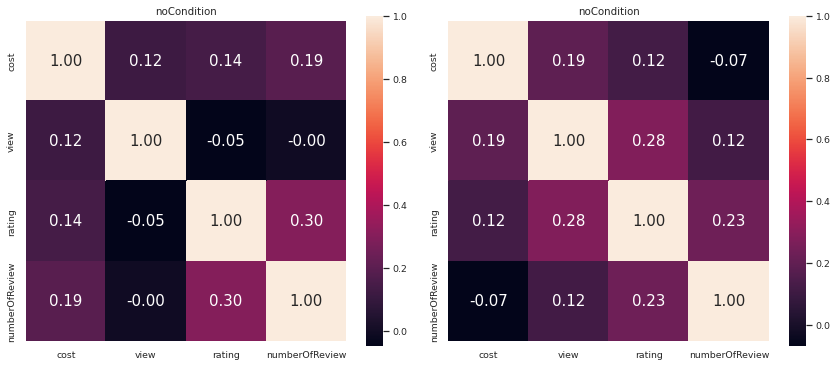

left: Male                                             right: Female


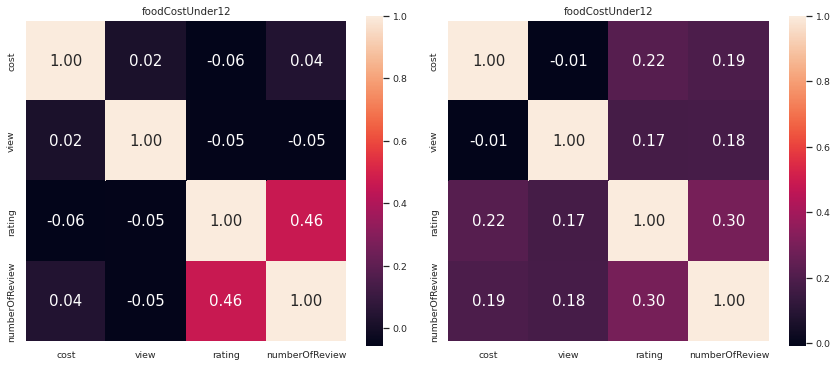

left: Male                                             right: Female


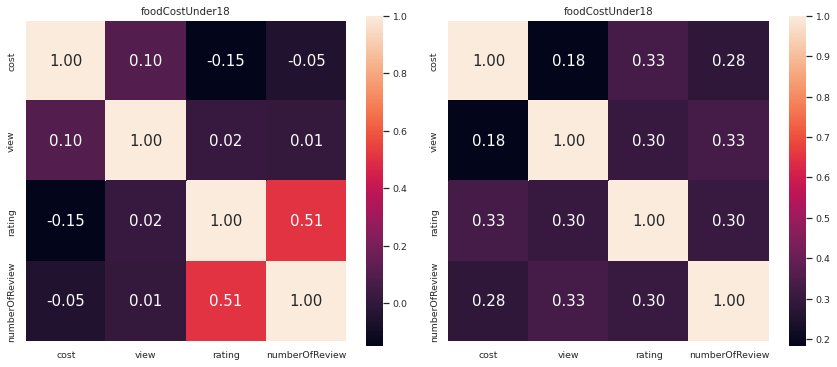

left: Male                                             right: Female


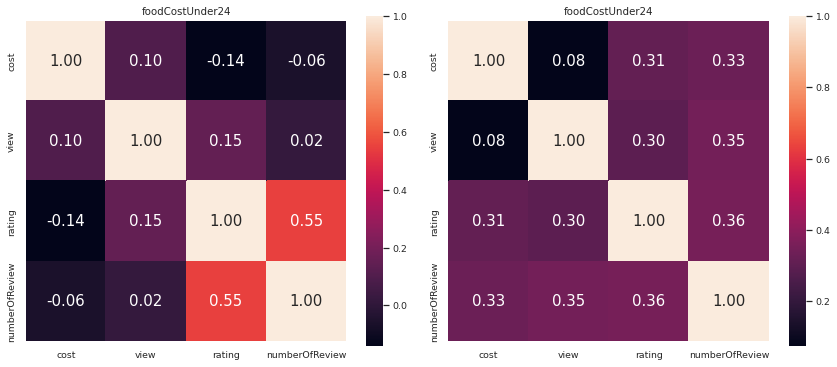

left: Male                                             right: Female


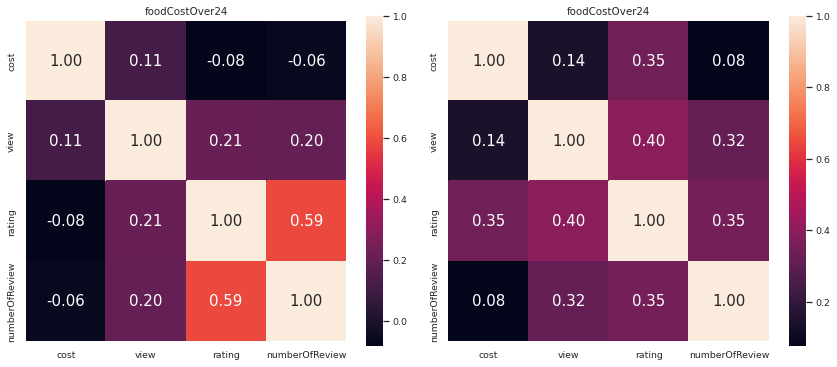

left: Male                                             right: Female


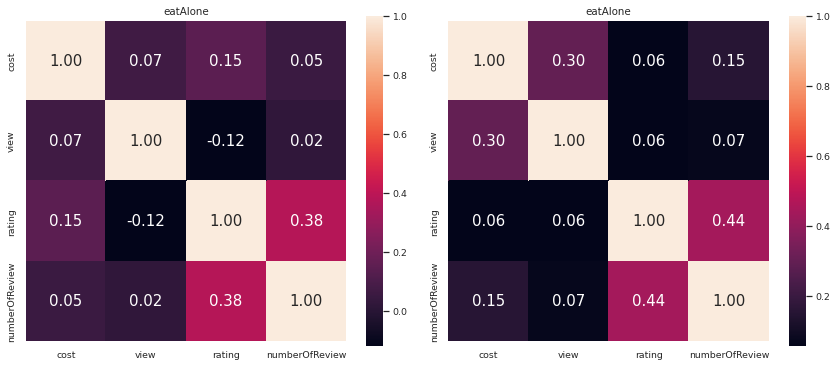

left: Male                                             right: Female


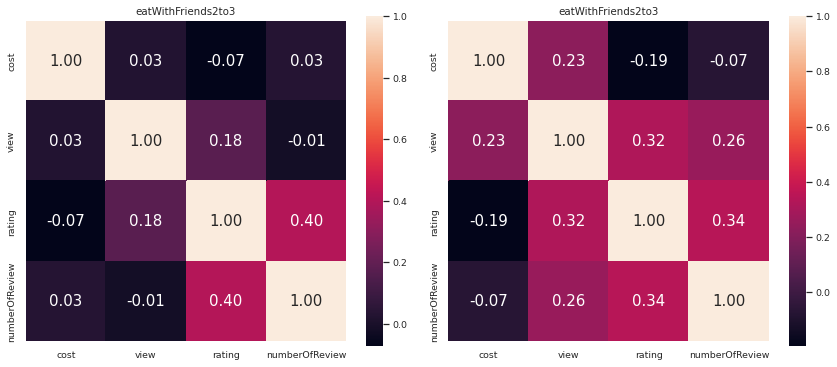

left: Male                                             right: Female


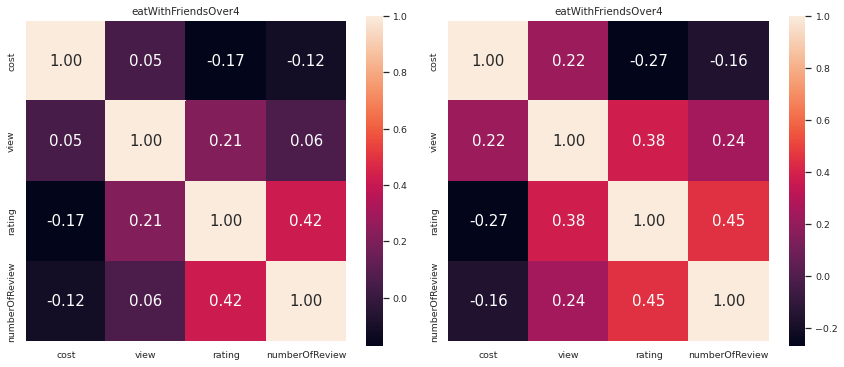

left: Male                                             right: Female


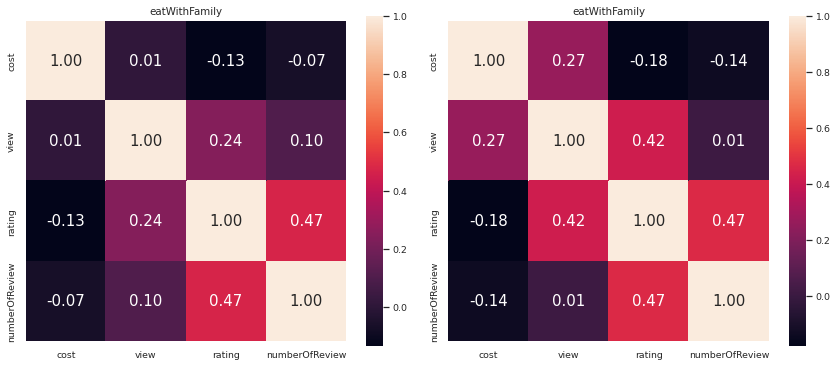

left: Male                                             right: Female


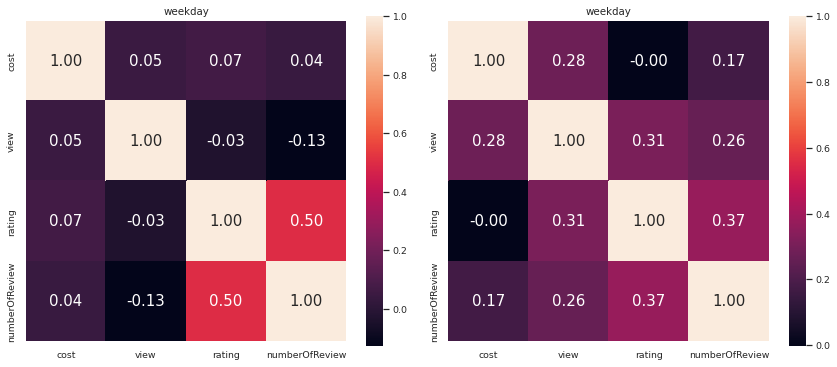

left: Male                                             right: Female


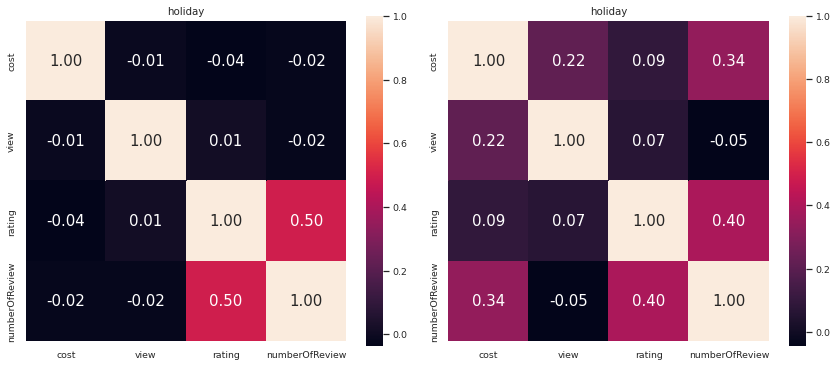

left: Male                                             right: Female


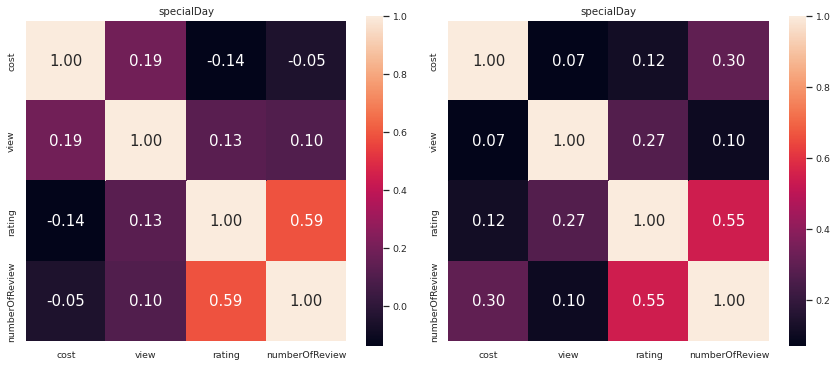

left: Male                                             right: Female


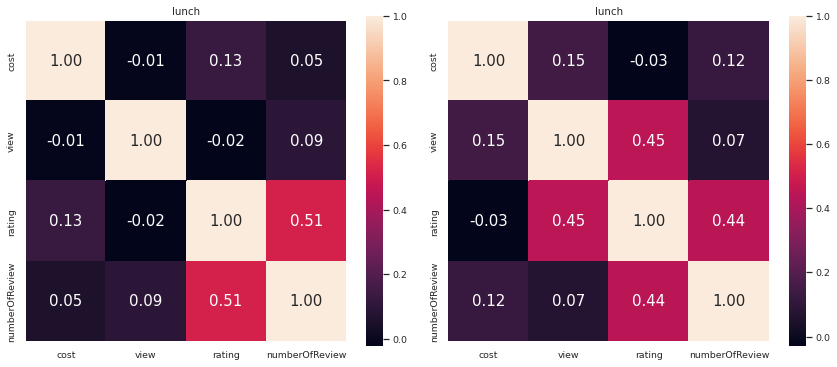

left: Male                                             right: Female


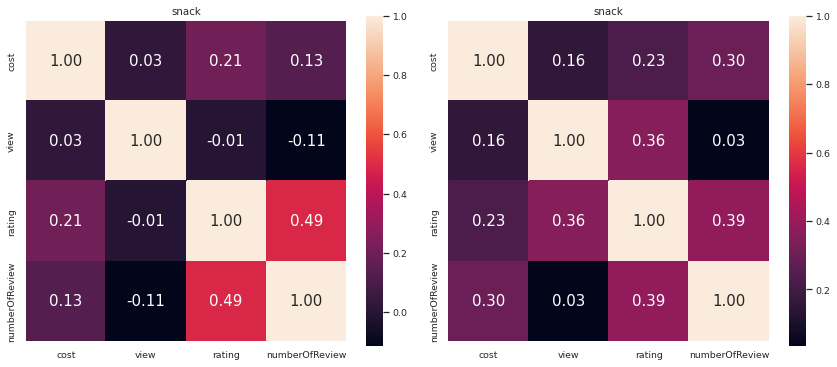

left: Male                                             right: Female


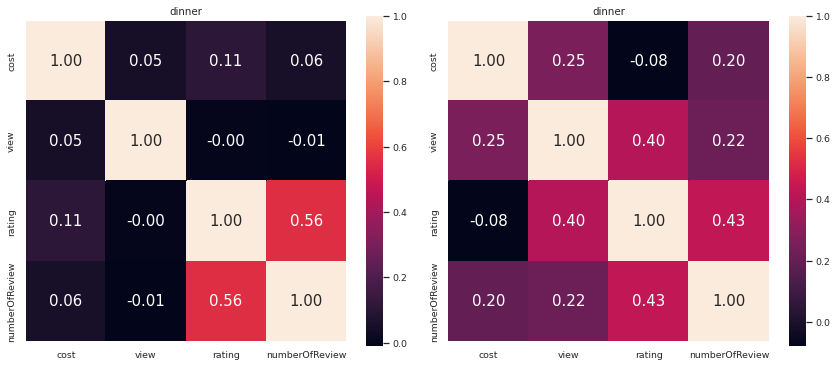

left: Male                                             right: Female


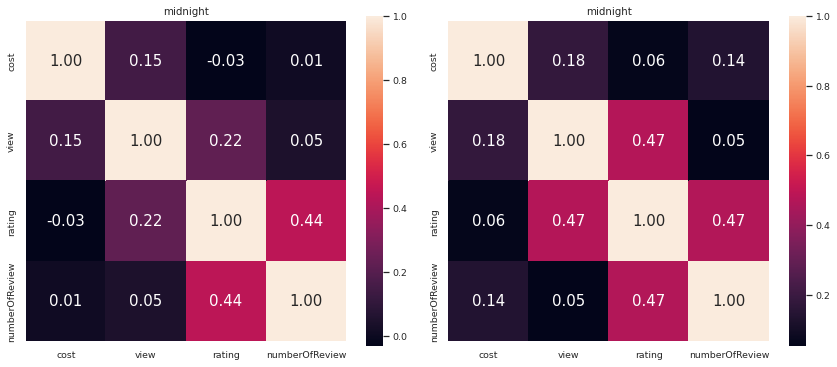

In [ ]:
# ④ 조절변수 내에서 독립변수간 피어슨 상관관계 분석
def correlationHitmap (prefixIndex):
    prefixName = prefix_names[prefixIndex]
    conditionCols = []
    for suffix in suffix_names:
      conditionCols.append(prefixName+'-'+suffix)
    CorrM = userSex[('남자')][conditionCols].corr(method='pearson')
    CorrW = userSex[('여자')][conditionCols].corr(method='pearson')
    cols_view=['cost','view','rating','numberOfReview']
    sns.set(font_scale=0.85)

    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    hm_m = sns.heatmap(CorrM.values,
                    cbar = True,
                    annot = True,
                    square = True,
                    fmt = '.2f',
                    ax = ax1,
                    annot_kws = {'size': 15},
                    yticklabels = cols_view,
                    xticklabels = cols_view)
    hm_w = sns.heatmap(CorrW.values,
                    cbar = True,
                    annot = True,
                    square = True,
                    fmt = '.2f',
                    ax = ax2,
                    annot_kws = {'size': 15},
                    yticklabels = cols_view,
                    xticklabels = cols_view)

    ax1.set_title(prefixName)
    ax2.set_title(prefixName)
    plt.tight_layout()
    plt.show()

for i in range(16):
  print('\033[1m' + "left: Male                                             right: Female")
  correlationHitmap(i)

#**2. 연령별 데이터 분석**
 * 연령별로 데이터를 분석하려 시도하였음
 * 허나 대부분의 표본이 20대인 점, 30대, 40대는 표본이 30명을 넘지 않는다는 점에서 제대로 분석할 수 없다고 판단
 * 20대의 경우는 연령에 조건을 두지 않은 전체 표본집단의 그래프와 비슷한 방향성을 지니기에 따로 분석할 필요가 없다고 봄

In [ ]:
userAge = data.groupby('userAge')
numofUserAge = userAge['userAge'].count()
print(numofUserAge)

userAge
20대    109
30대     11
40대      1
Name: userAge, dtype: int64


#**3. 가족 수에 따른 데이터 분석**
  * 현재 받은 설문조사에 따르면 가족의 수에 따른 분석에 차이가 있지 않을까 하는 생각 존재
  * 먼저 가족수 분포를 확인하기 위에 group by 활용
  * 확인 결과 4명이 69명으로 대부분 차지, 나머지는 30명 미만의 분포도를 보여주고 있음

In [ ]:
userFamily = data.groupby('numberOfFamily')
numOfFamily = userFamily['numberOfFamily'].count()
print(numOfFamily)

numberOfFamily
2명       10
3명       23
4명       69
5명       17
6명        1
7명 이상     1
Name: numberOfFamily, dtype: int64


# **알고자 한 부분**
**가족과 함께 먹을 때 중요하게 생각하는 요인**
* 가족 인원 수가 분류에 따라 소표본인 경우가 대부분
* 가족 인원수에 맞게 묶는 과정을 거칠 것
  * 2인, 3인 가족 묶기 (10 + 23 = 33)
  * 4인 가족 그대로 두기
  * 5인 이상 가족 묶기 (17 + 1 + 1 = 19)

**예상되는 문제점**
* 5인 이상 가족이 여전히 30명 미만

In [ ]:
# 데이터프레임을 가족수별로 나누기 위해 groupby 실행
numberOfFamily = dict(list(data.groupby(['numberOfFamily'])))

# 각 가족인원으로 데이터프레임 나누기
processed_20 = numberOfFamily[('2명')]
processed_30 = numberOfFamily[('3명')]
processed_50 = numberOfFamily[('5명')]
processed_60 = numberOfFamily[('6명')]
processed_70 = numberOfFamily[('7명 이상')]

# 짤라진 데이터프레임을 합치기: pandas의 .concat() 활용
numberOfFam2to3 = pd.concat([processed_20, processed_30], axis = 0, ignore_index = True)
numberOfFamOver5 = pd.concat([processed_50, processed_60, processed_70], axis = 0, ignore_index = True)

# .head()를 통해 우리가 정하고자 하는 조건에 맞게 데이터 프레임이 잘 합쳐진 것을 확인 가능

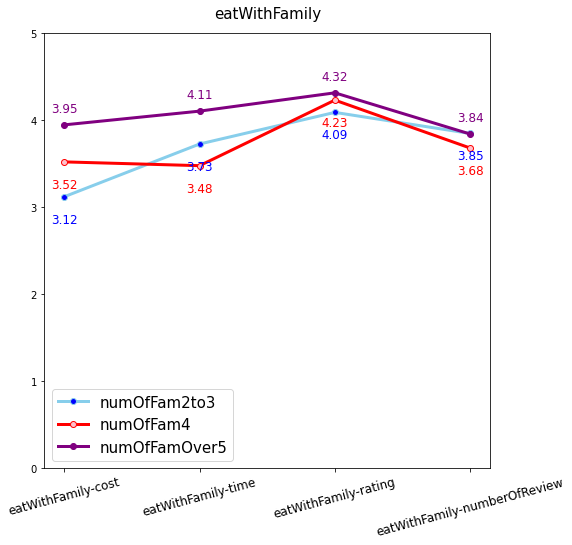

In [ ]:
numOfFamily = dict(list(data.groupby(['numberOfFamily'])))

# ② 조절변수 내에서 다양한 독립변수 기술통계분석
def showMeanAndStdInOneModerate (prefixIndex):

  prefixName = prefix_names[prefixIndex]

  dataBySingleModerate = data.iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]
  numOfFam2to3 = numberOfFam2to3.iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]
  numOfFam4 = numOfFamily[('4명')].iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]
  numOfFamOver5 = numberOfFamOver5.iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]

  fig, ax = plt.subplots(figsize=(8,8))
  plt.plot(numOfFam2to3.mean().index,
             numOfFam2to3.mean(),
             color='skyblue',
             marker='o', markerfacecolor='blue',
             markersize=6,lineWidth=3,
             label='numOfFam2to3'
             )
  plt.plot(numOfFam4.mean().index,
             numOfFam4.mean(),
             color='red',
             marker='o', markerfacecolor='pink',
             markersize=6,lineWidth=3,
             label='numOfFam4'
             )
  plt.plot(numOfFamOver5.mean().index,
             numOfFamOver5.mean(),
             color='purple',
             marker='o', markerfacecolor='purple',
             markersize=6,lineWidth=3,
             label='numOfFamOver5'
             )
  for idx in range(len(dataBySingleModerate.mean().index)):
      ax.text(numOfFam2to3.mean().index[idx],
              numOfFam2to3.mean()[idx] -0.3 ,
              round(numOfFam2to3.mean()[idx],2), 
              size=12, horizontalalignment='center', color='blue')
      ax.text(numOfFam4.mean().index[idx],
              numOfFam4.mean()[idx] -0.3 ,
              round(numOfFam4.mean()[idx],2), 
              size=12, horizontalalignment='center', color='red')
      ax.text(numOfFamOver5.mean().index[idx],
              numOfFamOver5.mean()[idx] +0.15 ,
              round(numOfFamOver5.mean()[idx],2), 
              size=12, horizontalalignment='center', color='purple')
  plt.title(prefixName,size=15,pad=15)
  plt.ylim([0,5])
  plt.xticks(rotation=15,fontSize=12)
  plt.legend(prop={'size':15})
  plt.show()

showMeanAndStdInOneModerate(8)